# Project Name - World Cup 2023 Analysis

Project Type - EDA \
Contribution - Individual

## Introduction

The Cricket World Cup stands as a pinnacle event in the realm of cricket, where nations compete fiercely for glory on the pitch. The 2023 edition of this prestigious tournament showcased thrilling matches, outstanding performances, and unforgettable moments that left an indelible mark on the cricketing world. In this project, we embark on a journey to uncover the intricacies of the 2023 Cricket World Cup through comprehensive data analysis.

## Objective

The primary objective of this project is to delve deep into the dataset encapsulating the 2023 Cricket World Cup, conducting an extensive exploratory data analysis (EDA) to extract valuable insights. By analyzing team performances, player statistics, match outcomes, and other pertinent factors, we aim to unravel the underlying trends, patterns, and dynamics that shaped the tournament.

### Lets Begin!

In [36]:
# Import Libraries
# Import Platform
import pandas as pd
import sklearn
import numpy as np

# Import Graphviz
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Import plotly.express as px
# Import plotly.graph objects as go

%matplotlib inline
import plotly.express as px

In [37]:
df = pd.read_csv('/Users/allanalex/Desktop/Projects/WC23.csv')
df.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [38]:
df.tail()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
1403,NZ,MJ Santner (NZ),bowl,60,51,0.0,0.0,0.850000,v India,Wankhede,15-Nov-23,10.0,1.0,5.10,1,NaN,NaN,NaN,NaN,NaN
1404,AUS,A Zampa (AUS),bowl,42,55,0.0,0.0,1.309524,v South Africa,Eden Gardens,16-Nov-23,7.0,0.0,7.85,1,NaN,NaN,NaN,NaN,NaN
1405,NZ,R Ravindra (NZ),bowl,42,60,0.0,0.0,1.428571,v India,Wankhede,15-Nov-23,7.0,0.0,8.57,1,NaN,NaN,NaN,NaN,NaN
1406,IND,RA Jadeja (IND),bowl,60,63,0.0,0.0,1.050000,v New Zealand,Wankhede,15-Nov-23,10.0,0.0,6.30,2,NaN,NaN,NaN,NaN,NaN
1407,NZ,LH Ferguson (NZ),bowl,48,65,0.0,0.0,1.354167,v India,Wankhede,15-Nov-23,8.0,0.0,8.12,1,NaN,NaN,NaN,NaN,NaN


In [39]:
df.shape

(1408, 20)

In [40]:
# Display the dimensions of the DataFrame
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1408
Number of columns: 20


In [41]:
# Dataset Rows & Columns count
rows, cols = df.shape
print(f'There are {rows} rows and {cols} columns in the dataset.')

There are 1408 rows and 20 columns in the dataset.


In [42]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [43]:
# Dataset Duplicate Value Count
duplicate_rows = df.duplicated().sum()

print(f'There are {duplicate_rows} duplicate_rows in the dataset')

There are 2 duplicate_rows in the dataset


In [44]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print(missing_values)

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64


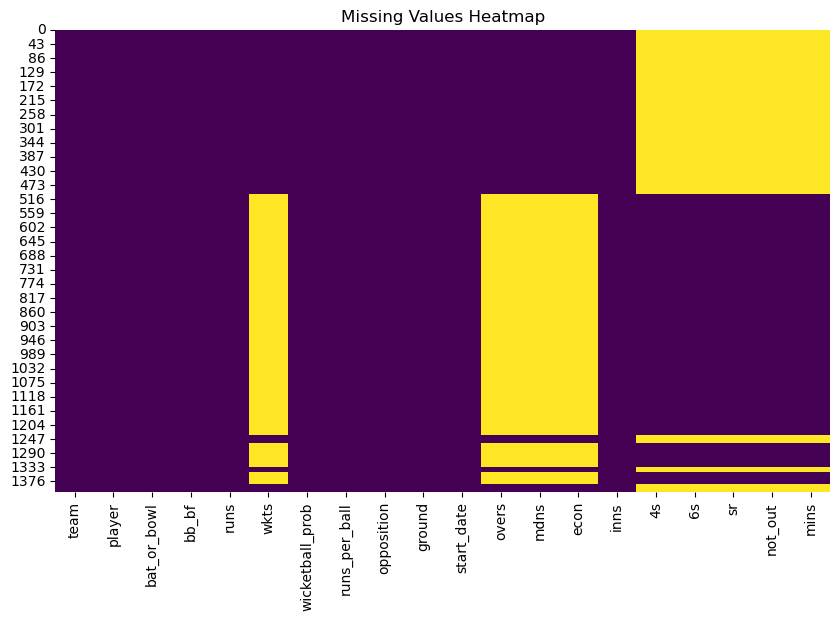

In [45]:
# Missingno matrix or the seaborn heatmap can be used.
# Seaborn heatmap is used.
# Visualizing the missing values
# Plot a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [46]:
# Count of missing values in the entire dataset
total_missing_values = df.isnull().sum().sum()
print("Total missing values in the dataset:", total_missing_values)

Total missing values in the dataset: 6194


In [47]:
# Dataset Size
print("Dataset Size:", len(df))

# Feature Quantity
print("Number of Features:", len(df.columns))

# Data Types
print("Data Types:")
print(df.dtypes.value_counts())

# Memory Usage
print("Memory Usage:")
print(df.info(memory_usage='deep'))

# Missing Values
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))

Dataset Size: 1408
Number of Features: 20
Data Types:
float64    11
object      6
int64       3
Name: count, dtype: int64
Memory Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns            

# Data Vizualization

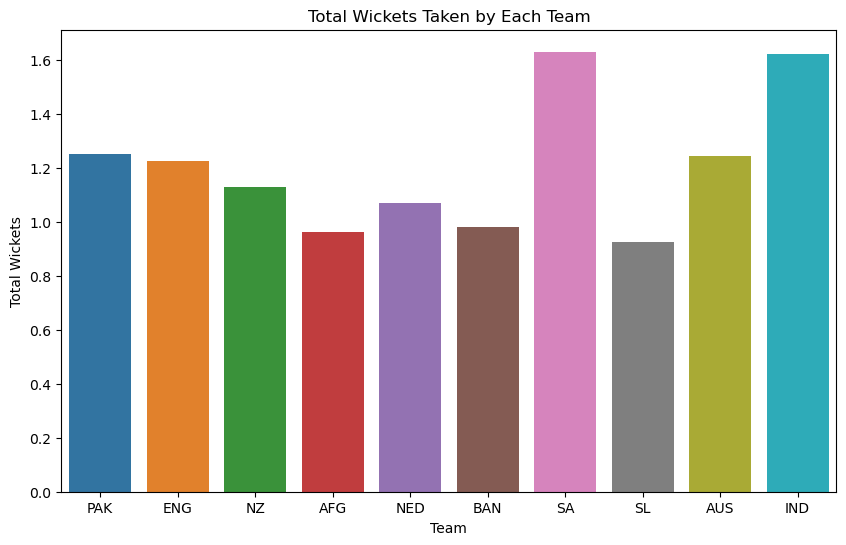

In [57]:
# Chart 1 - Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='team', y='wkts', data=df, errorbar=None)
plt.title('Total Wickets Taken by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Wickets')
plt.show()

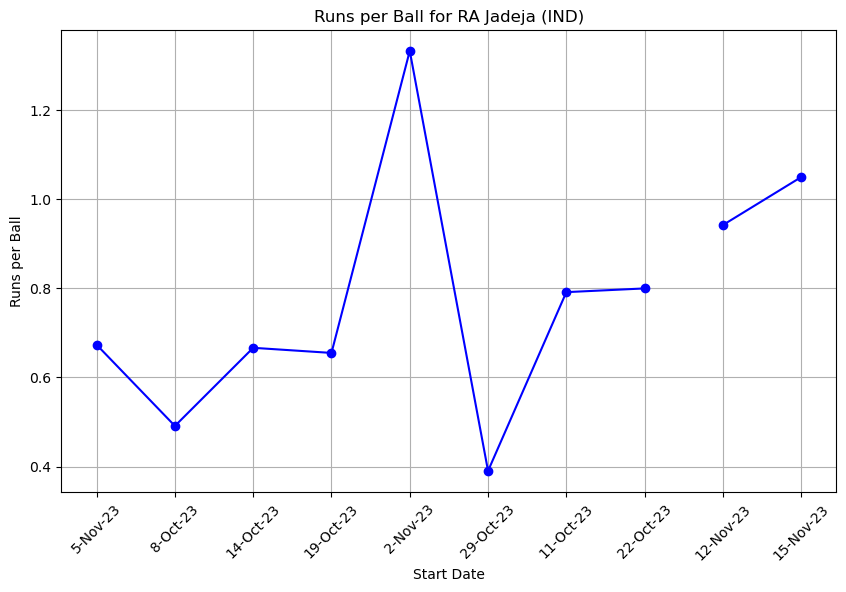

In [62]:
# Chart 2 - Line Graph
# Filter data for a specific player
specific_player = df[df['player'] == 'RA Jadeja (IND)'].copy()  # Use .copy() to create a new DataFrame

# Calculate runs per ball using .loc
specific_player.loc[:, 'runs_per_ball'] = specific_player['runs'] / (specific_player['bb_bf'] - specific_player['wkts'])

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(specific_player['start_date'], specific_player['runs_per_ball'], marker='o', color='blue')
plt.title('Runs per Ball for RA Jadeja (IND)')
plt.xlabel('Start Date')
plt.ylabel('Runs per Ball')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

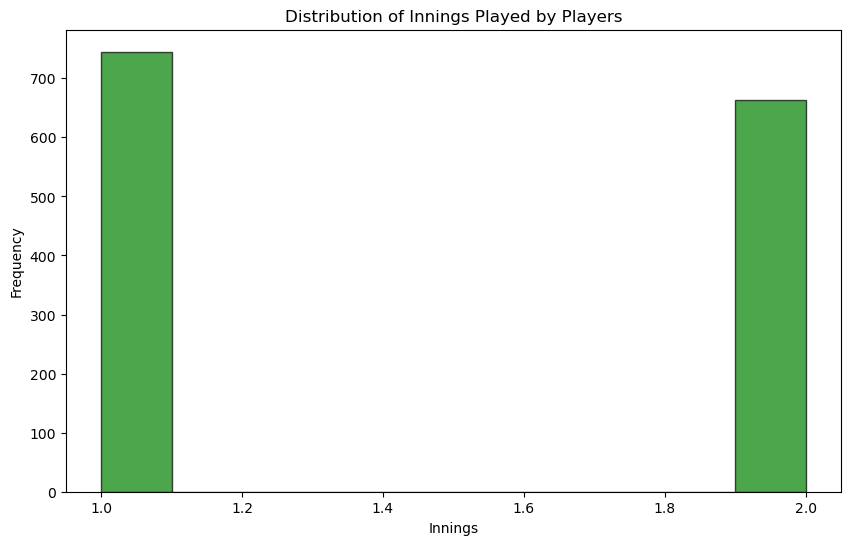

In [63]:
# Chart 3 - Histogram Chart
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['inns'], bins=10, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Innings Played by Players')
plt.xlabel('Innings')
plt.ylabel('Frequency')
plt.show()

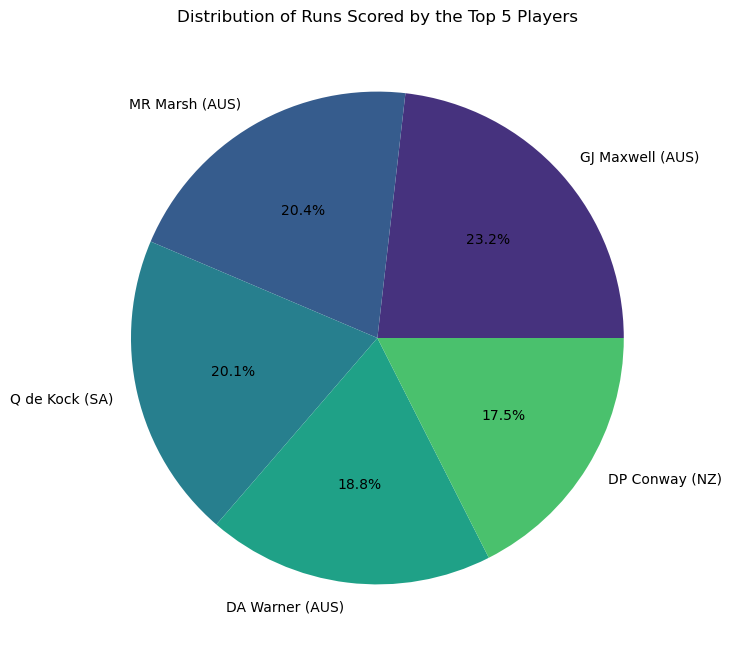

In [65]:
# Chart 4 - Pie Chart
# Get the top 5 players by runs
top_5_players = df.nlargest(5, 'runs')

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_players['runs'], labels=top_5_players['player'], autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of Runs Scored by the Top 5 Players')
plt.show()

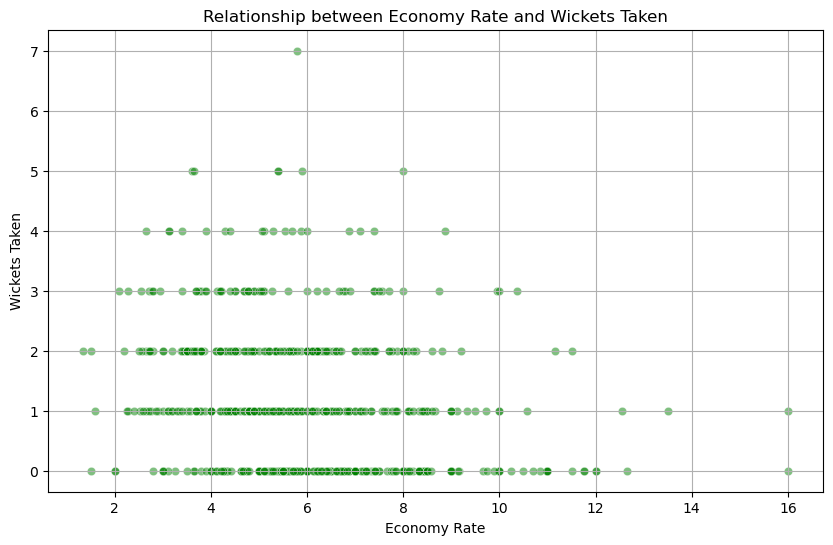

In [69]:
# Scattor Plot Chart
plt.figure(figsize=(10, 6))
sns.scatterplot(x='econ', y='wkts', data=df, color='green', alpha=0.5)
plt.title('Relationship between Economy Rate and Wickets Taken')
plt.xlabel('Economy Rate')
plt.ylabel('Wickets Taken')
plt.grid(True)
plt.show()

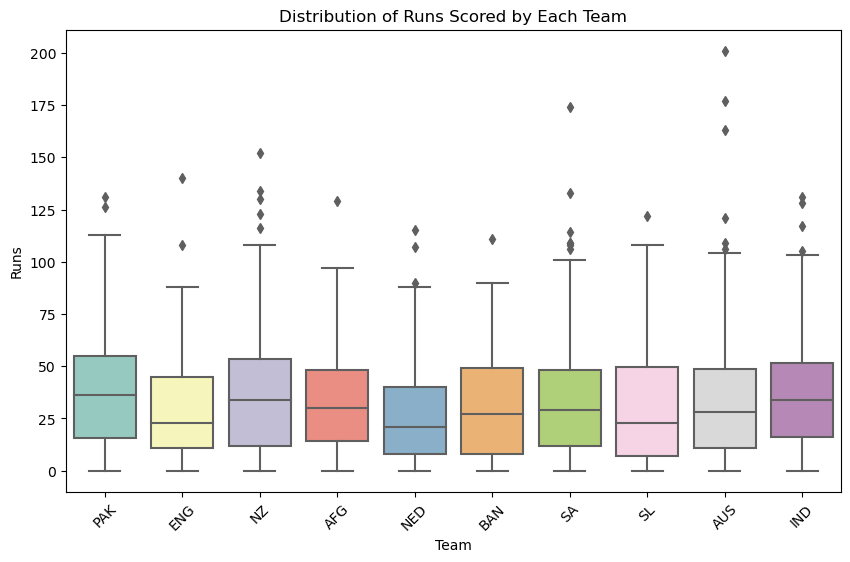

In [67]:
# Box Plot 
plt.figure(figsize=(10, 6))
sns.boxplot(x='team', y='runs', data=df, palette='Set3')
plt.title('Distribution of Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.show()

# Conclusion

Through rigorous data analysis and exploration, this project aims to offer valuable insights into the dynamics of the 2023 Cricket World Cup. By dissecting the tournament's data from various angles, we strive to uncover hidden patterns, illuminate standout performances, and provide a deeper understanding of the cricketing spectacle that captivated audiences around the globe. Join us as we unravel the stories etched on the pitch and celebrate the spirit of cricket showcased in the 2023 Cricket World Cup.